# Package Import

In [1]:
from SIR_gp import * #class implementation of the GP
from SIR_plot import * #functions for plotting of GP outputs 
from itertools import product
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

# Global Variables

In [2]:
PATH_TRAIN = "../GPs/imax/sim-training-maxIncidence-round15.txt" #training data 
PATH_TEST = "../data/sim/imax-duration/DD-AML-test-LHS-10000-condSim-logDuration.txt" #test data 
PATH_MODEL = "../GPs/imax/maxIncidence-round15-snap3.pth" #trained GP model snapshot 
MODEL_TYPE = "maxIncidence" #defines GP type: imax = maxIncidence, outbreak probability = establishment, duration = duration 

# Load trained GP

In [3]:
myGP = SIR_GP(training_data=PATH_TRAIN, model_type=MODEL_TYPE)
myGP.load(filename=PATH_MODEL)

#training of GP for 10 iterations (do not run)
#myGP.train(num_iterations=10)

Model loaded. Loss: -1.7758526802062988


# GP Performance

In [4]:
myGP.get_rmse(test_data=PATH_TEST) #calculate RMSE for the test set 

0.041912088098776126

# Sensitivity analysis

## Whole input domain

In [5]:
myGP.param_ranges #input domain 

{'alphaRest': (0, 0.03),
 'alphaAmp': (0, 1),
 'alphaShift': (0, 1),
 'infTicksCount': (4, 6),
 'avgVisitsCount': (1, 5),
 'pVisits': (0.05, 0.95),
 'propSocialVisits': (0, 1),
 'locPerSGCount': (1, 20)}

Points to be evaluated: 18432
Fished predictions. Starting sensitivity analysis.
                        ST   ST_conf
alphaRest         0.568793  0.054327
alphaAmp          0.040712  0.007390
alphaShift        0.129956  0.018086
infTicksCount     0.018275  0.002234
avgVisitsCount    0.285240  0.028513
pVisits           0.001468  0.000175
propSocialVisits  0.044042  0.009000
locPerSGCount     0.003752  0.000933
                        S1   S1_conf
alphaRest         0.529351  0.068163
alphaAmp         -0.006087  0.017308
alphaShift        0.097336  0.033126
infTicksCount     0.015373  0.013208
avgVisitsCount    0.266490  0.043666
pVisits           0.000751  0.003102
propSocialVisits  0.043873  0.022729
locPerSGCount    -0.001522  0.005762
                                          S2   S2_conf
(alphaRest, alphaAmp)               0.000632  0.093330
(alphaRest, alphaShift)            -0.001838  0.095869
(alphaRest, infTicksCount)         -0.010193  0.098510
(alphaRest, avgVisitsCount)      

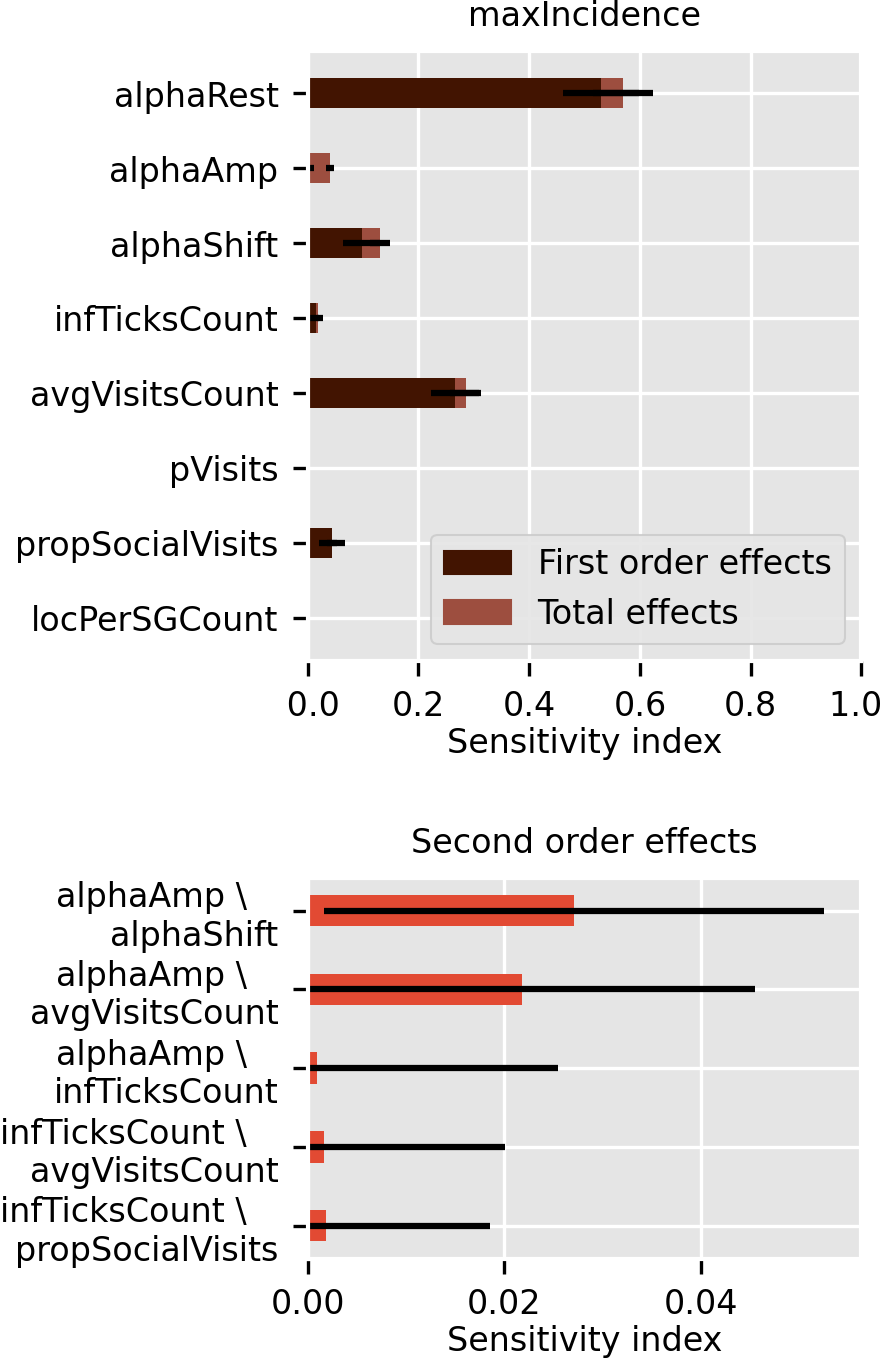

In [6]:
my_sa = myGP.sensitivity_analysis(pow2sampleSize=10, param_ranges=myGP.param_ranges, verbose=True)
sa_plot(my_sa, limit_num_second_order_bars=5)

## Subset parameter range

Points to be evaluated: 18432
Fished predictions. Starting sensitivity analysis.
                            ST       ST_conf
alphaRest         6.548813e-11  6.865075e-12
alphaAmp          1.636669e-01  2.218180e-02
alphaShift        6.930468e-01  7.115528e-02
infTicksCount     8.662130e-02  8.855833e-03
avgVisitsCount    9.535886e-12  2.111352e-12
pVisits           6.308649e-03  6.678062e-04
propSocialVisits  2.139996e-01  3.366489e-02
locPerSGCount     1.786116e-02  3.575948e-03
                            S1       S1_conf
alphaRest         4.290274e-07  6.819295e-07
alphaAmp          1.128681e-02  3.641500e-02
alphaShift        5.175207e-01  6.708999e-02
infTicksCount     8.775709e-02  2.947921e-02
avgVisitsCount    5.035315e-08  2.733867e-07
pVisits           5.197356e-03  7.590648e-03
propSocialVisits  1.976867e-01  4.689698e-02
locPerSGCount     7.215715e-03  1.129074e-02
                                              S2       S2_conf
(alphaRest, alphaAmp)               4.307825e-

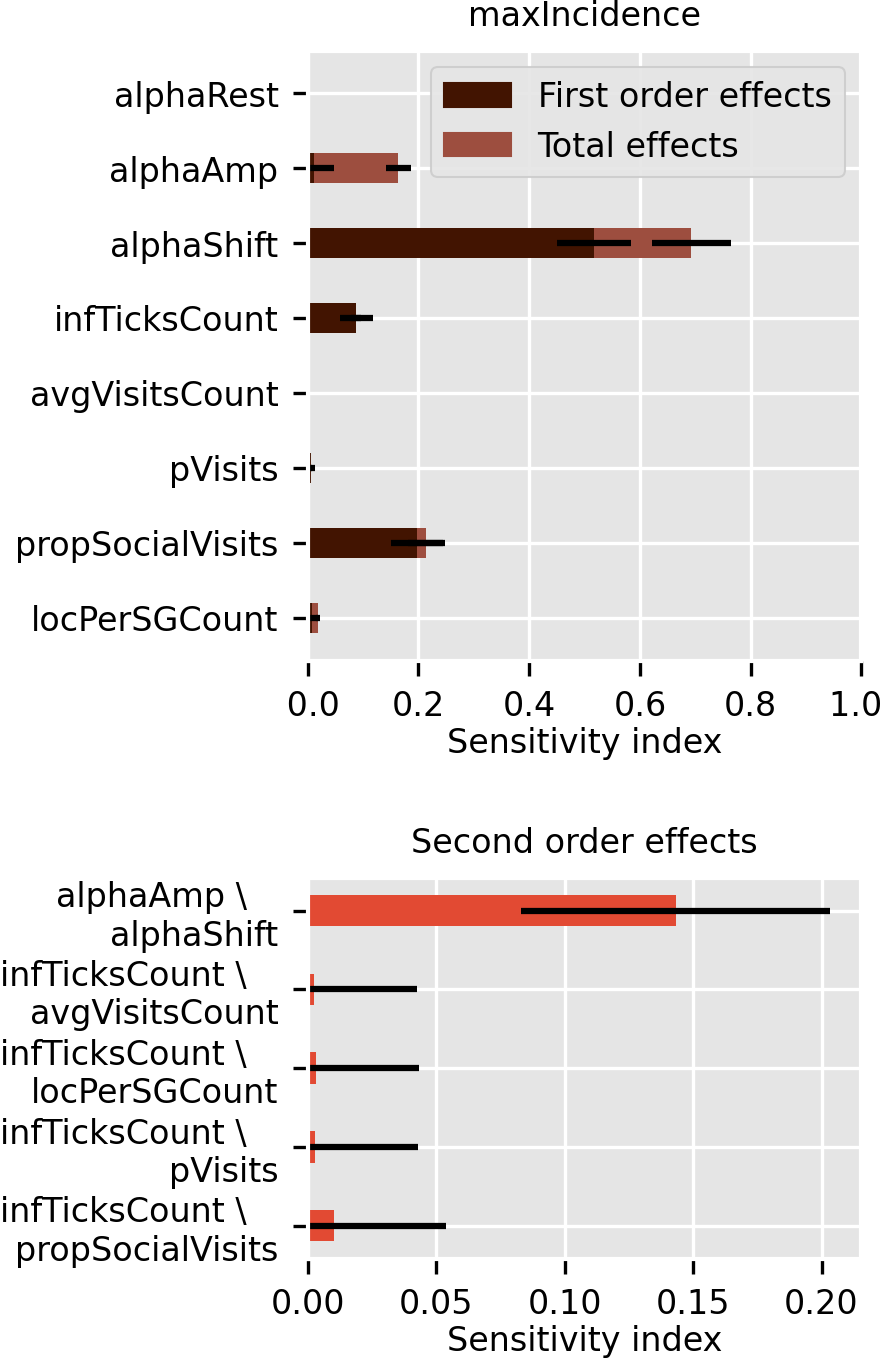

In [7]:
param_ranges = {'alphaRest': (0.015), #set average infectivity to 0.015 and average mobility to 2 
 'alphaAmp': (0, 1),
 'alphaShift': (0, 1),
 'infTicksCount': (4, 6),
 'avgVisitsCount': (2),
 'pVisits': (0.05, 0.95),
 'propSocialVisits': (0, 1),
 'locPerSGCount': (1, 20)}

sa = myGP.sensitivity_analysis(pow2sampleSize=10, param_ranges=param_ranges, verbose=True) #sensitivity analysis over subset of parameter range
sa_plot(sa, limit_num_second_order_bars=5)

# Prediction & Visualization 

## 1 parameter

### *plot_1d()* 
*plot_1d()* takes the following arguments:
- model: the model to use for predictions
- x_param: the varying parameter to plot on the x-axis
- fixed_params: values the other parameters are fixed at 
- param_ranges: ranges through which x_param will be varied
- x_steps: number of increments on the x-axis. 

Here is an example: 


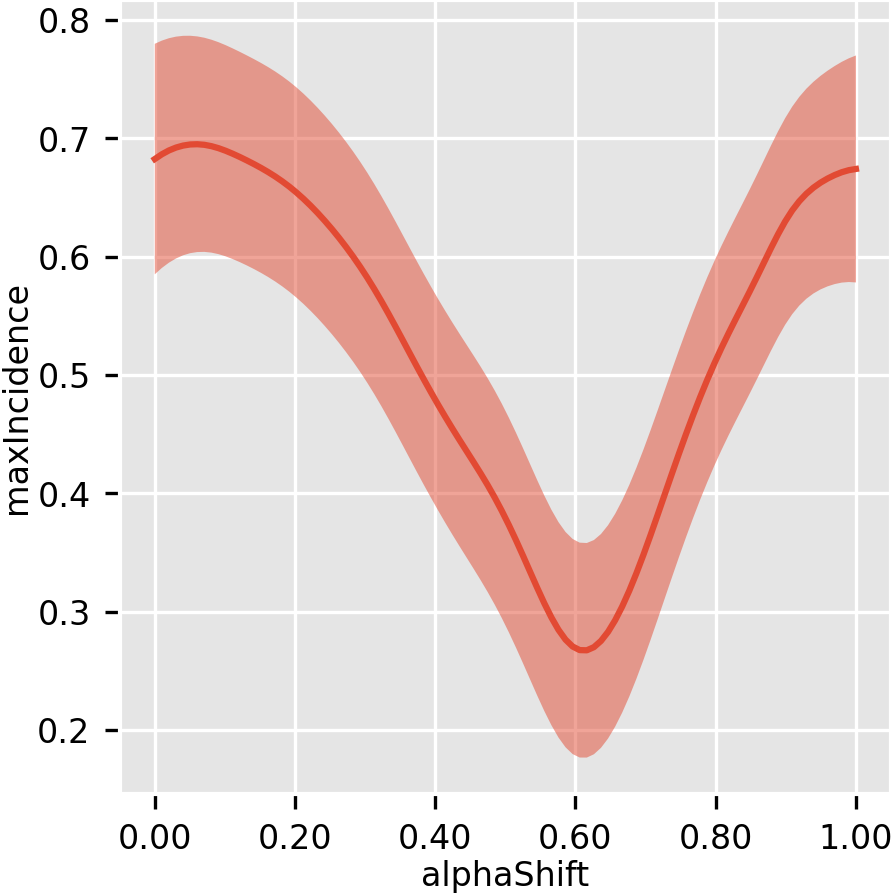

In [8]:
fixed_params = {'alphaRest': (0.015),
 'alphaAmp': (0.5),
 'infTicksCount': (5),
 'avgVisitsCount': (2),
 'pVisits': (0.5),
 'propSocialVisits': (0.5),
 'locPerSGCount': (5)}

var_params = {  #vary timing of first case while keeping all other parameters constant 
    'alphaShift' : (0,1)
}

plot_1d(model=myGP, x_param="alphaShift", param_ranges=var_params, fixed_params=fixed_params)

## 2 parameters

### *plot_2d()*
*plot_2d()* plots a 2D heatmap from the model and takes the following arguments:

- model: the model to use for predictions
- x_param: the varying parameter to plot on the x-axis
- y_param: the varying parameter to plot on the y-axis
- fixed_params: values the other parameters are fixed at 
- param_ranges: ranges through which x_param and y_param will be varied
- x_and_y_steps: number of increments on the x-axis and y_axis. The size of the heatmap will be x_and_y_steps times x_and_y_steps 

Here is an example: 

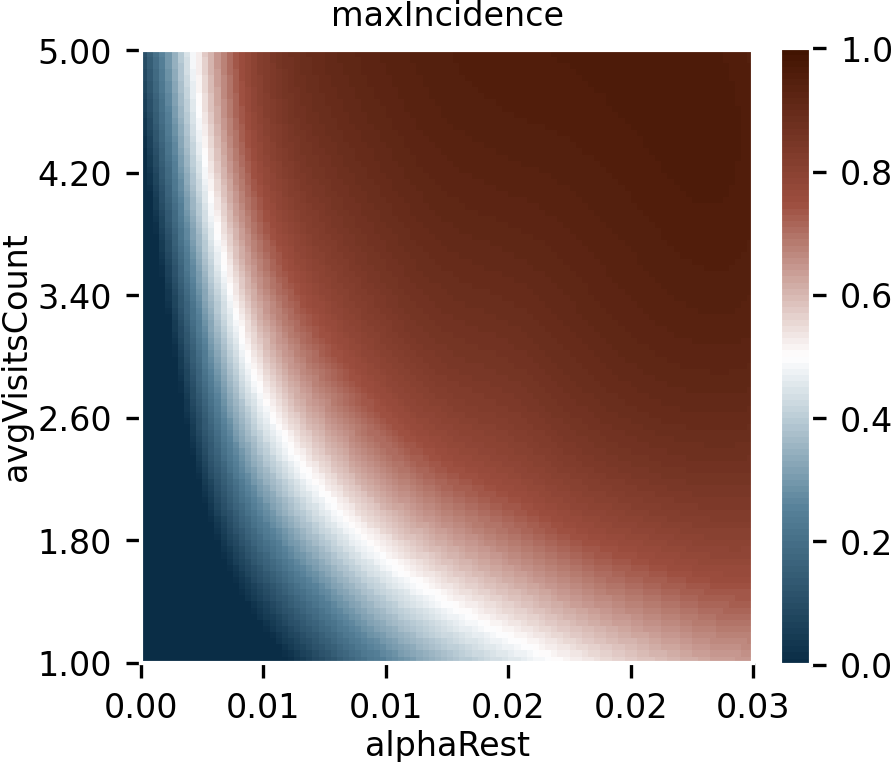

In [9]:
fixed_params = { 
 'alphaAmp': (0.5),
 'alphaShift': (0),
 'infTicksCount': (5),
 'pVisits': (0.5),
 'propSocialVisits': (0.5),
 'locPerSGCount': (5)}

var_params = {  #vary average infectivity and average mobility while keeping all other parameters constant 
    'alphaRest' : (0,0.03),
    'avgVisitsCount': (1, 5)
}

plot_2d(model=myGP, x_param="alphaRest", y_param="avgVisitsCount", param_ranges=var_params, fixed_params=fixed_params, x_and_y_steps=100)

## 3 parameters


*animated_plot()* plots an animated heatmap, where two parameters are displayed as a third parameter is varied. *animated_plot()* takes the following arguments:

- model: the model to use for predictions
- x_param: the varying parameter to plot on the x axis 
- y_param: the varying parameter to plot on the y axis
- z_param: the parameter that is varied through the course of the animation
- fixed_params: values the other parameters are fixed at
- param_ranges: ranges through which x_param and y_param will be varied
- x_and_y_steps: number of increments on the x-axis and y_axis. The size of the heatmap will be x_and_y_steps times x_and_y_steps 
- z_steps: the number of steps for the third parameter (i.e., number of frames)

Here is an example: 

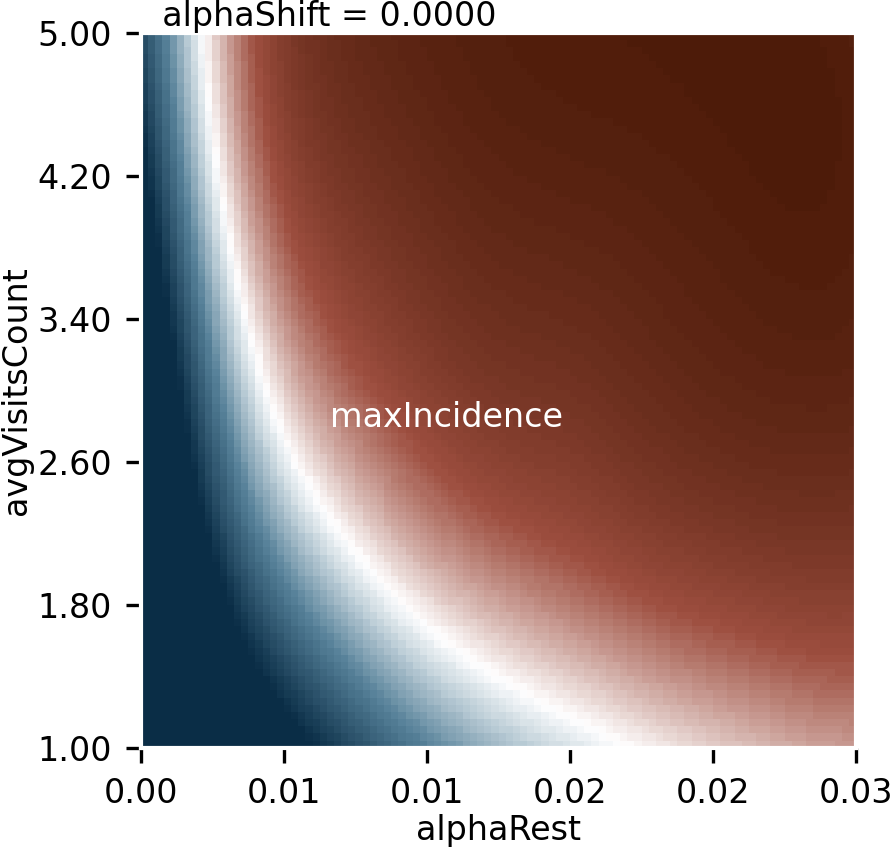

In [10]:
fixed_params = {
 'alphaAmp': (0.5),
 'infTicksCount': (5),
 'pVisits': (0.5),
 'propSocialVisits': (0.5),
 'locPerSGCount': (5)}

var_params = {  #vary average infectivity, average mobility, and seasonality strength 
    'alphaRest' : (0,0.03),
    'avgVisitsCount': (1, 5),
    'alphaShift' : (0, 1)
}
anim = animated_plot(model=myGP, x_param="alphaRest", y_param="avgVisitsCount", z_param="alphaShift", fixed_params=fixed_params, param_ranges=var_params, x_and_y_steps=100, z_steps=20)
HTML(anim.to_jshtml())